In [1]:
import wave
import os
import io
import pathlib
from pathlib import Path
from scipy.io import wavfile
import sounddevice as sd
import time
import librosa as lb
import librosa.display as dsp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
p = Path(r'input/happy/2cf28b70_nohash_0.wav')
print(p)

input\happy\2cf28b70_nohash_0.wav


In [6]:
samplerate, data = wavfile.read(p)

In [7]:
print(data.size)

16000


In [8]:
data.shape

(16000,)

In [13]:
sd.play(data, samplerate)
time.sleep(2.0)
sd.stop()

In [19]:
data = data.astype(float)
mfcc_sample = lb.feature.mfcc(y = data, sr = samplerate, n_mfcc = 32)

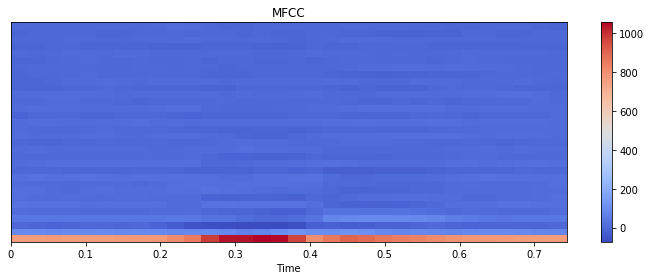

In [20]:
plt.figure(figsize=(10, 4))
lb.display.specshow(mfcc_sample, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [34]:
mfcc_sample.shape

(15, 32)

In [58]:
p = Path(r'input/happy/0c2d2ffa_nohash_0.wav')
samplerate, data = wavfile.read(p)
data = data.astype(float)
mfcc_sample_2 = lb.feature.mfcc(y = data, sr = samplerate, n_mfcc = 32)

In [35]:
mfccs = np.array([mfcc_sample])

In [59]:
mfcc_sample_2.shape

(32, 32)

In [39]:
mfccs = np.append(mfccs,mfcc_sample_2.reshape(1,mfcc_sample_2.shape[0],mfcc_sample_2.shape[1]),axis = 0)

In [54]:
A = np.zeros((15,40))

In [55]:
 A[0:mfcc_sample.shape[0], 0:mfcc_sample.shape[1]] += mfcc_sample

In [56]:
A.shape

(15, 40)

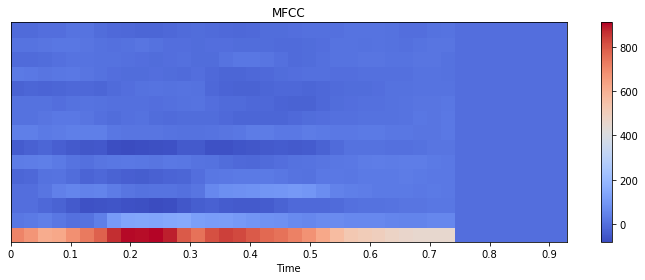

In [57]:
plt.figure(figsize=(10, 4))
lb.display.specshow(A, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [42]:
mfccs = []

mfcc_sample_v = np.mean(mfcc_sample.T,axis=0)
mfcc_sample_v2 = np.mean(mfcc_sample_2.T,axis=0)

l1 = "happy"
l2 = "happy"

mfccs.append(mfcc_sample_v)
mfccs.append(mfcc_sample_v2)

In [45]:
featuresdf = pd.DataFrame(mfccs, columns=['feature'])

ValueError: 1 columns passed, passed data had 15 columns